Importing all neccesary libraries

In [1]:
import numpy as np
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 
from bs4 import BeautifulSoup
import urllib.request
print('Libraries imported.')

Libraries imported.


Creating an overview of Ghent from Wikipedia

In [2]:
URL = 'https://nl.wikipedia.org/wiki/Gent#wijken'
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')

In [3]:
all_tables=soup.find_all("table", class_='wikitable')
all_tables
i=0
A=[]
B=[]
C=[]
D=[]
for tabellen in all_tables:
    if i ==1:
        for rows in tabellen.findAll('tr'):
            cells = rows.findAll('td')
            if len(cells)==4:
                A.append(cells[0].find(text=True))
                B.append(cells[1].findAll(text=True))
                C.append(cells[2].find(text=True))
                D.append(cells[3].find(text=True)[:-1])
    i+=1
#right_table=soup.find('table', class_='wikitable sortable')

In [4]:
def kortlijst(lijst):
    o = []
    for i in lijst:
        i= i.strip(', ')
        if len(i)>2:
            o.append(i.strip(', '))
    return o

import pandas as pd
df=pd.DataFrame(A,columns=['Wijk'])
df['Kwartier']=B
df['Area']=C
df['Population']=D

df= df[~(df['Wijk'] =='Not assigned')]
#this is the coding part that removes the 'not assigned' boroughs
df['Kwartier']= df['Kwartier'].apply(lambda x: kortlijst(x))
#removing empty strings in neighborhood
df.reset_index(drop=True, inplace=True)
df

,Wijk,Kwartier,Area,Population
0,Binnenstad,"[Brusselse Poort, Twee poorten, Dierentuin, Ge...","2,67",17.083
1,Sluizeken - Tolhuis - Ham,"[Briel, Voormuide, Tolhuis, Ham]","1,25",10.383
2,Macharius - Heirnis,"[Sint-Macharius, Heirnis, Visserij]","0,74",6.544
3,Brugse Poort - Rooigem,"[Brugse Poort, Drongensesteenweg, Groendreef, ...","2,54",16.721
4,Watersportbaan - Ekkergem,"[Bijloke, Blaarmeersen, Ekkergem, Neermeersen]","3,68",7.035
5,Elisabethbegijnhof - Papegaai,"[Begijnhofdries, Galgenberg, Pekelharing]","0,94",7.217
6,Rabot - Blaisantvest,"[Blaisantvest, Wondelgemstraat, Rabot, Rabot S...","0,86",9.231
7,Wondelgem,"[Wondelgem, Centrum, Westergem, Kouterken, Woe...","9,22",13.709
8,Bloemekenswijk,"[Rustoord, Oude Lieve, Van Beverenplein]","1,67",8.746
9,Muide - Meulestede - Afrikalaan,"[Afrikalaan, Meulestede, Muide, Muidebrug]","1,51",5.729


Accessing my Foursquare API

In [5]:
CLIENT_ID = 'XT5BR1NUZLHE2KCSFC1OAJ5323BCFZ1G3GHDRM0GFPHAFX2B' # your Foursquare ID
CLIENT_SECRET = 'PP2VBKPB0MRMIL2NFEJ3TTZS53534GATPLSQ4RQ0INUTGEBN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XT5BR1NUZLHE2KCSFC1OAJ5323BCFZ1G3GHDRM0GFPHAFX2B
CLIENT_SECRET:PP2VBKPB0MRMIL2NFEJ3TTZS53534GATPLSQ4RQ0INUTGEBN


Defining the function to acces my Foursquare Data with all categories of data

In [6]:
def getNearbyVenuesWorking(names, latitudes, longitudes, radius=200, LIMIT= 500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

Defining the function to acces foursquare data, to get the number of venues 

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=250, LIMIT= 500):
    
    venues_list=[]
    try:
        for name, lat, lng in zip(names, latitudes, longitudes):
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                      'Neighborhood Latitude', 
                      'Neighborhood Longitude', 
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude', 
                      'Venue Category']
        return(nearby_venues['Venue'].count())
    except: 
        return 0

Creating a matrix with the number of venues for each area in Ghent in order to find the hotspot areas

In [8]:
namen = ['Linksboven','Rechtsboven', 'linksonder','rechtsonder' ]
latitudes= [51.065746, 51.066286, 51.031753,51.034236 ]
longitudes= [3.684781, 3.744691, 3.695252, 3.745034 ]

LatRange = [51.031, 51.066] #delta 0.035
LonRange = [3.684, 3.744] #delta 0.06 

#Make a raster of 37+1 by 30+1 squares to decide 'touristic hotspots'
LatSpace = list(np.linspace(51.031, 51.066, 18))
LonSpace = list(np.linspace(3.684, 3.744, 31))


df_ = pd.DataFrame(index=LonSpace, columns=LatSpace)
df_ = df_.fillna(0)





Calling the function for each coordinate

In [9]:
for i in df_.columns:
    for j in df_.index:
        df_[i][j] = getNearbyVenues(['temp'],[i],[j])
df_

,51.031000,51.033059,51.035118,51.037176,51.039235,51.041294,51.043353,51.045412,51.047471,51.049529,51.051588,51.053647,51.055706,51.057765,51.059824,51.061882,51.063941,51.066000
3.684,5,2,6,6,4,5,8,13,18,18,7,3,0,2,1,1,1,6
3.686,4,2,7,10,4,6,14,23,19,16,6,2,4,4,3,3,0,6
3.688,4,2,7,10,4,5,12,22,15,15,4,4,5,4,4,5,4,13
3.690,3,1,7,11,6,5,12,24,23,9,6,4,5,7,6,5,18,12
3.692,1,1,3,5,5,8,2,13,20,9,8,6,12,11,5,4,18,15
3.694,1,2,3,1,4,4,2,12,21,17,1,4,13,13,6,9,10,12
3.696,0,1,1,1,3,2,1,5,17,11,3,8,14,9,6,4,0,5
3.698,1,1,1,1,1,3,1,9,12,6,6,9,14,10,6,5,6,11
3.700,2,4,3,2,1,6,4,12,11,8,15,14,11,17,17,14,5,8
3.702,3,4,4,2,4,8,9,12,14,10,14,12,8,18,20,12,5,8


plotting a heatmap for Ghent to get a view of which regions are interesting

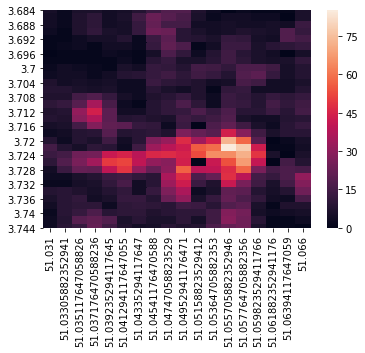

In [19]:
import seaborn as sns
heatm = sns.heatmap(df_)
heatm

Call the function for  single point in order to see how the point are represented

In [11]:
getNearbyVenuesWorking(['Maximale'],[51.055706],[3.722], 280)
getNearbyVenuesWorking([df['Wijk'].iloc[0]],[51.055706],[3.722], 150)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Binnenstad,51.055706,3.722,Graslei,51.054733,3.720568,Plaza
1,Binnenstad,51.055706,3.722,Giri,51.056171,3.720198,Bistro
2,Binnenstad,51.055706,3.722,LUSH,51.055974,3.722690,Cosmetics Shop
3,Binnenstad,51.055706,3.722,Kin Khao,51.054747,3.722953,Thai Restaurant
4,Binnenstad,51.055706,3.722,Hot Club Gent,51.056296,3.722520,Jazz Club
5,Binnenstad,51.055706,3.722,De Alchemist,51.056638,3.720633,Bar
6,Binnenstad,51.055706,3.722,Korenmarkt,51.054385,3.721876,Plaza
7,Binnenstad,51.055706,3.722,Koperhuis,51.056912,3.722380,Furniture / Home Store
8,Binnenstad,51.055706,3.722,Otomat,51.056328,3.721597,Pizza Place
9,Binnenstad,51.055706,3.722,Mosquito Coast,51.055312,3.723466,Cocktail Bar


Call each function twice for each area that has a high number of bussinesses (at least 22 in the area). Make the call once for a scan with 200 meter and once with 280m radius. Each time for the same location. Saving both results with the same coordinates in the summary matrix 

In [12]:
dfVenues = pd.DataFrame(index=LonSpace, columns=LatSpace)

for i in dfVenues.columns:
    for j in dfVenues.index:
        if df_[i][j] >22:
            short = getNearbyVenuesWorking(['Gent'],[i],[j],200)
            shortdict = short['Venue Category'].value_counts().to_dict()
            far = getNearbyVenuesWorking(['Gent'],[i],[j],280)
            fardict = far['Venue Category'].value_counts().to_dict()
            dfVenues[i][j] = [shortdict,fardict]
            
            #far = getNearbyVenuesWorking(['Gent'],[i],[j],280)
dfVenues

,51.031000,51.033059,51.035118,51.037176,51.039235,51.041294,51.043353,51.045412,51.047471,51.049529,51.051588,51.053647,51.055706,51.057765,51.059824,51.061882,51.063941,51.066000
3.684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'Soccer Field': 2, 'Track': 2, 'Sports Club'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'Soccer Field': 4, 'Sports Club': 2, 'Rugby ...","[{'Gym / Fitness Center': 2, 'Soccer Field': 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Compare the results for each location. By comparing each location to see which bussinesses are popular in the larger area but are absent in the small area. 
This let us find the missing bussiness. 

In [13]:
dfAfwezig = pd.DataFrame(index=LonSpace, columns=LatSpace)
dfVenues.fillna(0, inplace = True)
 
for i in dfVenues.columns:
    for j in dfVenues.index: 
        dicti = {}
        if dfVenues[i][j] ==0:
            pass
        else:
            kort = dfVenues[i][j][0]
            lang = dfVenues[i][j][1]
            for k in lang.keys():
                if k in kort.keys():
                    pass
                elif lang[k]>3:
                    dicti[k] = lang[k]
        dfAfwezig[i][j] = dicti
dfAfwezig

,51.031000,51.033059,51.035118,51.037176,51.039235,51.041294,51.043353,51.045412,51.047471,51.049529,51.051588,51.053647,51.055706,51.057765,51.059824,51.061882,51.063941,51.066000
3.684,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
3.686,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
3.688,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
3.690,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
3.692,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
3.694,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
3.696,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
3.698,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
3.700,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
3.702,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}


Transform the large matrix to a pandas list

In [14]:
ListLocations = [['Latitude','Longitude','Type Venue', 'In area']]
for i in dfAfwezig.columns:
    for j in dfAfwezig.index: 
        if len(dfAfwezig[i][j])>0:
            for keys in dfAfwezig[i][j]:
                ListLocations.append([i,j,keys, dfAfwezig[i][j][keys] ])
dfLL = pd.DataFrame(ListLocations[1:], columns = ListLocations[0])
dfLL

,Latitude,Longitude,Type Venue,In area
0,51.047471,3.724,Bar,6
1,51.049529,3.724,Bar,4
2,51.049529,3.730,Bar,5
3,51.053647,3.728,Bar,8
4,51.053647,3.728,Nightclub,4
5,51.057765,3.720,Pub,5


Create a folium map to quickly spot where new bussiness opportunities arrise

In [15]:
import folium

colorss = {'Bar' : 'red', 'Pub' : 'green', 'Nightclub' : 'blue'}
latitudeCentre = LatSpace[int(len(LatSpace)/2)+2]
longitudeCentre = LonSpace[int(len(LonSpace)/2)]


m = folium.Map(location=[latitudeCentre, longitudeCentre], zoom_start=14)


for lat, lon, venue, size in zip(dfLL['Latitude'], dfLL['Longitude'], dfLL['Type Venue'], dfLL['In area']):
    
    label = folium.Popup(str(venue) + ' opportunity with ' + str(size) + ' in larger area', parse_html=True)
    kleur = colorss[venue]
    folium.CircleMarker(
            [lat, lon],
            radius=size*2,
            popup=label,
            color=kleur,
            fill=True,
            fill_color=kleur,
            fill_opacity=0.7).add_to(m)


Plot the map, which is the en result of this data-analysis

In [16]:
m

In [17]:
import folium

colorss = {'Bar' : 'red', 'Pub' : 'green', 'Nightclub' : 'blue'}
latitudeCentre = LatSpace[int(len(LatSpace)/2)+2]
longitudeCentre = LonSpace[int(len(LonSpace)/2)]


m2 = folium.Map(location=[latitudeCentre, longitudeCentre], zoom_start=14)


for lat, lon, venue, size in zip(dfLL['Latitude'], dfLL['Longitude'], dfLL['Type Venue'], dfLL['In area']):
    
    label = folium.Popup(str(venue) + ' opportunity with ' + str(size) + ' in larger area', parse_html=True)
    kleur = colorss[venue]
    folium.Circle(
            [lat, lon],
            radius=280,
            popup=label,
            color=kleur,
            fill=True,
            fill_color=kleur,
            fill_opacity=0.4).add_to(m2)
    label = folium.Popup(str(venue) + ' opportunity without ' + str(size) + ' in larger area', parse_html=True)
    kleur = colorss[venue]
    folium.Circle(
            [lat, lon],
            radius=200,
            popup=label,
            color=kleur,
            fill=True,
            fill_color=kleur,
            fill_opacity=0.8).add_to(m2)
    

In [18]:
m2